In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
allfiles = os.listdir("./Cars/")
df = pd.DataFrame()

for file in allfiles:
    x = file.split("_")

In [3]:
features = ['Make', 'Model', 'Year', 'MSRP', 'FrontWheelSize', 'Horsepower',
'Displacement', 'EngineType', 'Width', 'Height',
'Length', 'GasMileage', 'Drivetrain', 'PassengerCapacity', 'PassengerDoors',
'BodyStyle', 'FileExt']

In [4]:
filedata = []

for file in allfiles:
    x = file.split("_")
    filedata.append(x)

In [5]:
df = pd.DataFrame(filedata, columns=features)

In [6]:
df.head()

,Make,Model,Year,MSRP,FrontWheelSize,Horsepower,Displacement,EngineType,Width,Height,Length,GasMileage,Drivetrain,PassengerCapacity,PassengerDoors,BodyStyle,FileExt
0,Buick,Envision,2019,37,18,190,25,4,72,66,183,21,AWD,5,4,SUV,dFJ.jpg
1,Rolls-Royce,Ghost,2019,345,19,560,66,12,76,61,219,12,RWD,5,4,4dr,rbs.jpg
2,Mitsubishi,Outlander,2014,22,16,160,24,4,70,66,183,25,FWD,7,4,SUV,uir.jpg
3,Kia,Rio,2013,16,15,130,16,4,67,57,171,28,FWD,5,4,4dr,qoW.jpg
4,Nissan,Pathfinder,2014,39,20,260,35,6,77,69,197,20,FWD,7,4,SUV,qSD.jpg


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64467 entries, 0 to 64466
Data columns (total 17 columns):
Make                 64467 non-null object
Model                64467 non-null object
Year                 64467 non-null object
MSRP                 64467 non-null object
FrontWheelSize       64467 non-null object
Horsepower           64467 non-null object
Displacement         64467 non-null object
EngineType           64467 non-null object
Width                64467 non-null object
Height               64467 non-null object
Length               64467 non-null object
GasMileage           64467 non-null object
Drivetrain           64467 non-null object
PassengerCapacity    64467 non-null object
PassengerDoors       64467 non-null object
BodyStyle            64467 non-null object
FileExt              64467 non-null object
dtypes: object(17)
memory usage: 8.4+ MB


In [8]:
df.describe()

,Make,Model,Year,MSRP,FrontWheelSize,Horsepower,Displacement,EngineType,Width,Height,Length,GasMileage,Drivetrain,PassengerCapacity,PassengerDoors,BodyStyle,FileExt
count,64467,64467,64467,64467,64467,64467,64467,64467,64467,64467,64467,64467,64467,64467,64467,64467,64467
unique,42,323,27,207,11,73,48,8,26,38,88,43,5,10,5,9,51750
top,Chevrolet,Cooper,2019,24,18,180,20,4,72,57,nan,nan,AWD,5,4,4dr,HYZ.jpg
freq,5079,539,10224,2080,18403,4151,12568,29324,7481,7103,6609,6973,21537,36865,47767,21144,6


In [9]:
df['Make'].unique()

array(['Buick', 'Rolls-Royce', 'Mitsubishi', 'Kia', 'Nissan',
       'Mercedes-Benz', 'Subaru', 'McLaren', 'Acura', 'Toyota',
       'Alfa Romeo', 'Ford', 'Honda', 'BMW', 'Land Rover', 'Hyundai',
       'Aston Martin', 'MINI', 'Chevrolet', 'Volvo', 'smart', 'FIAT',
       'Maserati', 'Audi', 'Volkswagen', 'INFINITI', 'Porsche', 'Jeep',
       'Lamborghini', 'Chrysler', 'Cadillac', 'Dodge', 'Lexus', 'Jaguar',
       'GMC', 'Genesis', 'Ram', 'Mazda', 'Bentley', 'Lincoln', 'Tesla',
       'Ferrari'], dtype=object)

In [10]:
make_features = pd.get_dummies(df['Make'])

In [11]:
df['PassengerCapacity'] = df['PassengerCapacity'].astype(float)
df['Width'] = df['Width'].replace('- ', 'nan').astype(float)
df['MSRP'] = df['MSRP'].astype(float)

In [12]:
df1 = pd.concat([make_features, df[['MSRP', 'PassengerCapacity', 'Width']]], axis=1)

In [13]:
df1.shape

(64467, 45)

In [14]:
df1.describe()

,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,...,Rolls-Royce,Subaru,Tesla,Toyota,Volkswagen,Volvo,smart,MSRP,PassengerCapacity,Width
count,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,...,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,63673.000000,63740.000000,63609.000000
mean,0.018211,0.004498,0.008904,0.048567,0.063924,0.010812,0.014953,0.020336,0.078784,0.008842,...,0.004297,0.024896,0.002963,0.071323,0.027177,0.019095,0.005988,48.054639,4.961814,73.274364
std,0.133714,0.066920,0.093940,0.214964,0.244620,0.103417,0.121367,0.141148,0.269404,0.093615,...,0.065409,0.155811,0.054351,0.257366,0.162599,0.136860,0.077148,44.903785,1.284912,3.906763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,61.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,71.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,5.000000,73.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,5.000000,76.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,492.000000,9.000000,87.000000


In [15]:
df2 = df1.dropna()

In [16]:
X = df2.drop('MSRP', axis=1).astype(float)
X['Width'] = X['Width'] / 100
X['PassengerCapacity'] = X['PassengerCapacity'] /10.0
y = df2['MSRP'].astype(float) /100.0

In [17]:
X.columns

Index(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
       'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hyundai', 'INFINITI',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'MINI', 'Maserati', 'Mazda', 'McLaren', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart', 'PassengerCapacity',
       'Width'],
      dtype='object')

In [18]:
X.describe()

,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,...,Ram,Rolls-Royce,Subaru,Tesla,Toyota,Volkswagen,Volvo,smart,PassengerCapacity,Width
count,63542.000000,63542.000000,63542.000000,63542.00000,63542.000000,63542.000000,63542.000000,63542.000000,63542.000000,63542.000000,...,63542.000000,63542.000000,63542.000000,63542.000000,63542.000000,63542.000000,63542.000000,63542.000000,63542.000000,63542.000000
mean,0.018350,0.004233,0.009033,0.04811,0.064619,0.009805,0.015171,0.020097,0.079931,0.008970,...,0.011756,0.004249,0.024488,0.002959,0.070615,0.027478,0.019373,0.006075,0.496382,0.732727
std,0.134215,0.064927,0.094615,0.21400,0.245854,0.098532,0.122234,0.140333,0.271189,0.094287,...,0.107787,0.065047,0.154559,0.054314,0.256182,0.163473,0.137833,0.077704,0.128502,0.039082
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.610000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.710000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.730000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.760000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000,0.870000


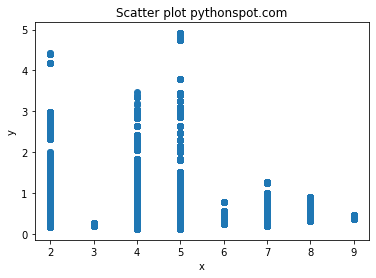

In [19]:
plt.scatter(df2['PassengerCapacity'], y)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63542 entries, 0 to 64466
Data columns (total 44 columns):
Acura                63542 non-null float64
Alfa Romeo           63542 non-null float64
Aston Martin         63542 non-null float64
Audi                 63542 non-null float64
BMW                  63542 non-null float64
Bentley              63542 non-null float64
Buick                63542 non-null float64
Cadillac             63542 non-null float64
Chevrolet            63542 non-null float64
Chrysler             63542 non-null float64
Dodge                63542 non-null float64
FIAT                 63542 non-null float64
Ferrari              63542 non-null float64
Ford                 63542 non-null float64
GMC                  63542 non-null float64
Genesis              63542 non-null float64
Honda                63542 non-null float64
Hyundai              63542 non-null float64
INFINITI             63542 non-null float64
Jaguar               63542 non-null float64
Jeep       

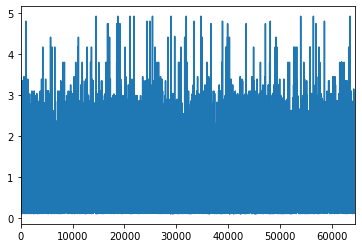

In [21]:
y.plot()

In [25]:
df['PassengerCapacity'].value_counts()

5.0    36865
4.0    10422
7.0     5469
2.0     4499
6.0     3102
8.0     2547
3.0      578
9.0      250
0.0        8
Name: PassengerCapacity, dtype: int64

In [24]:
X = X['PassengerCapacity', 'Width']
model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))
coeff = model.coef_
print(coeff)
print(model.intercept_)

KeyError: ('PassengerCapacity', 'Width')

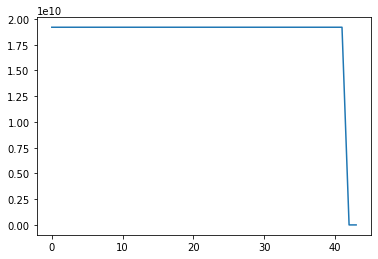

In [289]:
plt.plot(coeff)

<BarContainer object of 44 artists>

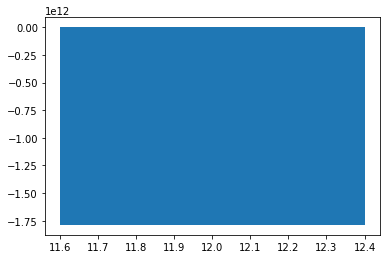

In [253]:
plt.bar(12, coeff, align='center', alpha=0.5)

In [8]:
df1 = df[['MSRP', 'PassengerCapacity', 'Width']]
df2 = df1.dropna()
X = df2.drop('MSRP', axis=1).astype(float)
#X = df[['MSRP', 'PassengerCapacity', 'Width']]
X['PassengerCapacity'] = X['PassengerCapacity'] /10.0
y = df2['MSRP'].astype(float) /100.0

In [9]:
model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))
coeff = model.coef_
print(coeff)
print(model.intercept_)

0.257718694896268
[-1.4575194  0.056781 ]
-2.956356292179158


In [97]:
#df['EngineType'] = df['EngineType'].astype(float)
df['PassengerCapacity'] = df['PassengerCapacity'].astype(float)
df['Width'] = df['Width'].replace('- ', 'nan').astype(float)
df['MSRP'] = df['MSRP'].astype(float)

In [121]:
make_features = pd.get_dummies(df['Make'])

In [114]:
df.describe()

,MSRP,Width,PassengerCapacity
count,63673.000000,63609.000000,63740.000000
mean,48.054639,73.274364,4.961814
std,44.903785,3.906763,1.284912
min,11.000000,61.000000,0.000000
25%,26.000000,71.000000,5.000000
50%,36.000000,73.000000,5.000000
75%,51.000000,76.000000,5.000000
max,492.000000,87.000000,9.000000


In [64]:
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit([df['EngineType'], df['PassengerCapacity']])
# imp.transform([df['EngineType'], df['PassengerCapacity']])

In [127]:
df1['Width'].unique()
df1.info()
make_features.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63542 entries, 0 to 64466
Data columns (total 17 columns):
Make                 63542 non-null object
Model                63542 non-null object
Year                 63542 non-null object
MSRP                 63542 non-null float64
FrontWheelSize       63542 non-null object
Horsepower           63542 non-null object
Displacement         63542 non-null object
EngineType           63542 non-null object
Width                63542 non-null float64
Height               63542 non-null object
Length               63542 non-null object
GasMileage           63542 non-null object
Drivetrain           63542 non-null object
PassengerCapacity    63542 non-null float64
PassengerDoors       63542 non-null object
BodyStyle            63542 non-null object
FileExt              63542 non-null object
dtypes: float64(3), object(14)
memory usage: 8.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63542 entries, 0 to 64466
Data columns (total 42 colum

In [113]:
df1 = df.dropna()
#X.dropna().info

<bound method DataFrame.info of Empty DataFrame
Columns: [Acura, Alfa Romeo, Aston Martin, Audi, BMW, Bentley, Buick, Cadillac, Chevrolet, Chrysler, Dodge, FIAT, Ferrari, Ford, GMC, Genesis, Honda, Hyundai, INFINITI, Jaguar, Jeep, Kia, Lamborghini, Land Rover, Lexus, Lincoln, MINI, Maserati, Mazda, McLaren, Mercedes-Benz, Mitsubishi, Nissan, PassengerCapacity, Porsche, Ram, Rolls-Royce, Subaru, Tesla, Toyota, Volkswagen, Volvo, Width, smart]
Index: []

[0 rows x 44 columns]>

In [128]:
#X = [df['Horsepower'], df['Width'], df['Height'], df['Length'], df['GasMileage']]
#X = df1[['PassengerCapacity', 'Width']]
X = pd.concat([make_features, df1[['PassengerCapacity', 'Width']]])
#X.dropna()
#X = df1[['PassengerCapacity', 'Width']]
y = df1['MSRP']
model = LinearRegression()
#mask = ~np.isnan(df['Horsepower']) & ~np.isnan(df['Width']) & ~np.isnan(df['Height']) & ~np.isnan(df['Length']) & ~np.isnan(df['GasMileage'])

/home/ubuntu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


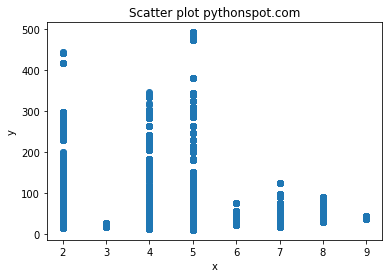

In [93]:
import matplotlib.pyplot as plt
plt.scatter(df1['PassengerCapacity'], y)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

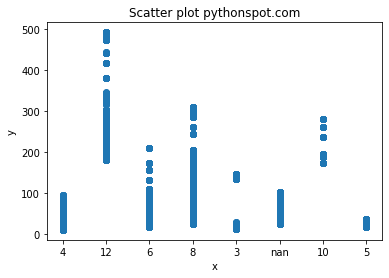

In [94]:
import matplotlib.pyplot as plt
plt.scatter(df1['EngineType'], y)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [103]:
X.head()

,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,...,Porsche,Ram,Rolls-Royce,Subaru,Tesla,Toyota,Volkswagen,Volvo,Width,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [129]:
model.fit(X, y)
print(model.score(X, y))
print(model.coef_)
print(model.intercept_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').